This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Read the column description and ensure you understand each attribute well

Study the data distribution in each attribute, share your findings. (10 points)

Get the target column distribution. Your comments

Split the data into training and test set in the ratio of 70:30 respectively

Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

Print the confusion matrix for all the above models (10 points)


Give your reasoning on which is the best model in this case and why it performs better? (10 points)


Dataset:Bank_Personal_Loan_Modelling.csv
Column description:TheraBank_Column_Description.xlsx
Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.
 
 
 
 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore


In [36]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [37]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [39]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [40]:
df.isnull().values.any()

False

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


We got negative values for "experience" which might be misrecorded. There are 52 records for negative experience . Hence, we can remove those rows 

In [42]:
indexrows = df[df['Experience']< 0].index

In [43]:
df = df.drop(indexrows, axis=0)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4948.0,2501.268795,1443.277676,1.0,1254.75,2497.5,3750.25,5000.0
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.00,224.0
ZIP Code,4948.0,93151.573363,2126.669017,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.00,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.60,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.00,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.00,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.00,1.0


In [45]:
# There wasnt much change in the values for measures of central tendency after dropping the records with negative values for experience

Study the data distribution in each attribute, share your findings. (10 points)

Age and Experience seems to be normally distributed(mean is almost equal to median)
The distribution for income seems to be slightly skewed to the right



C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


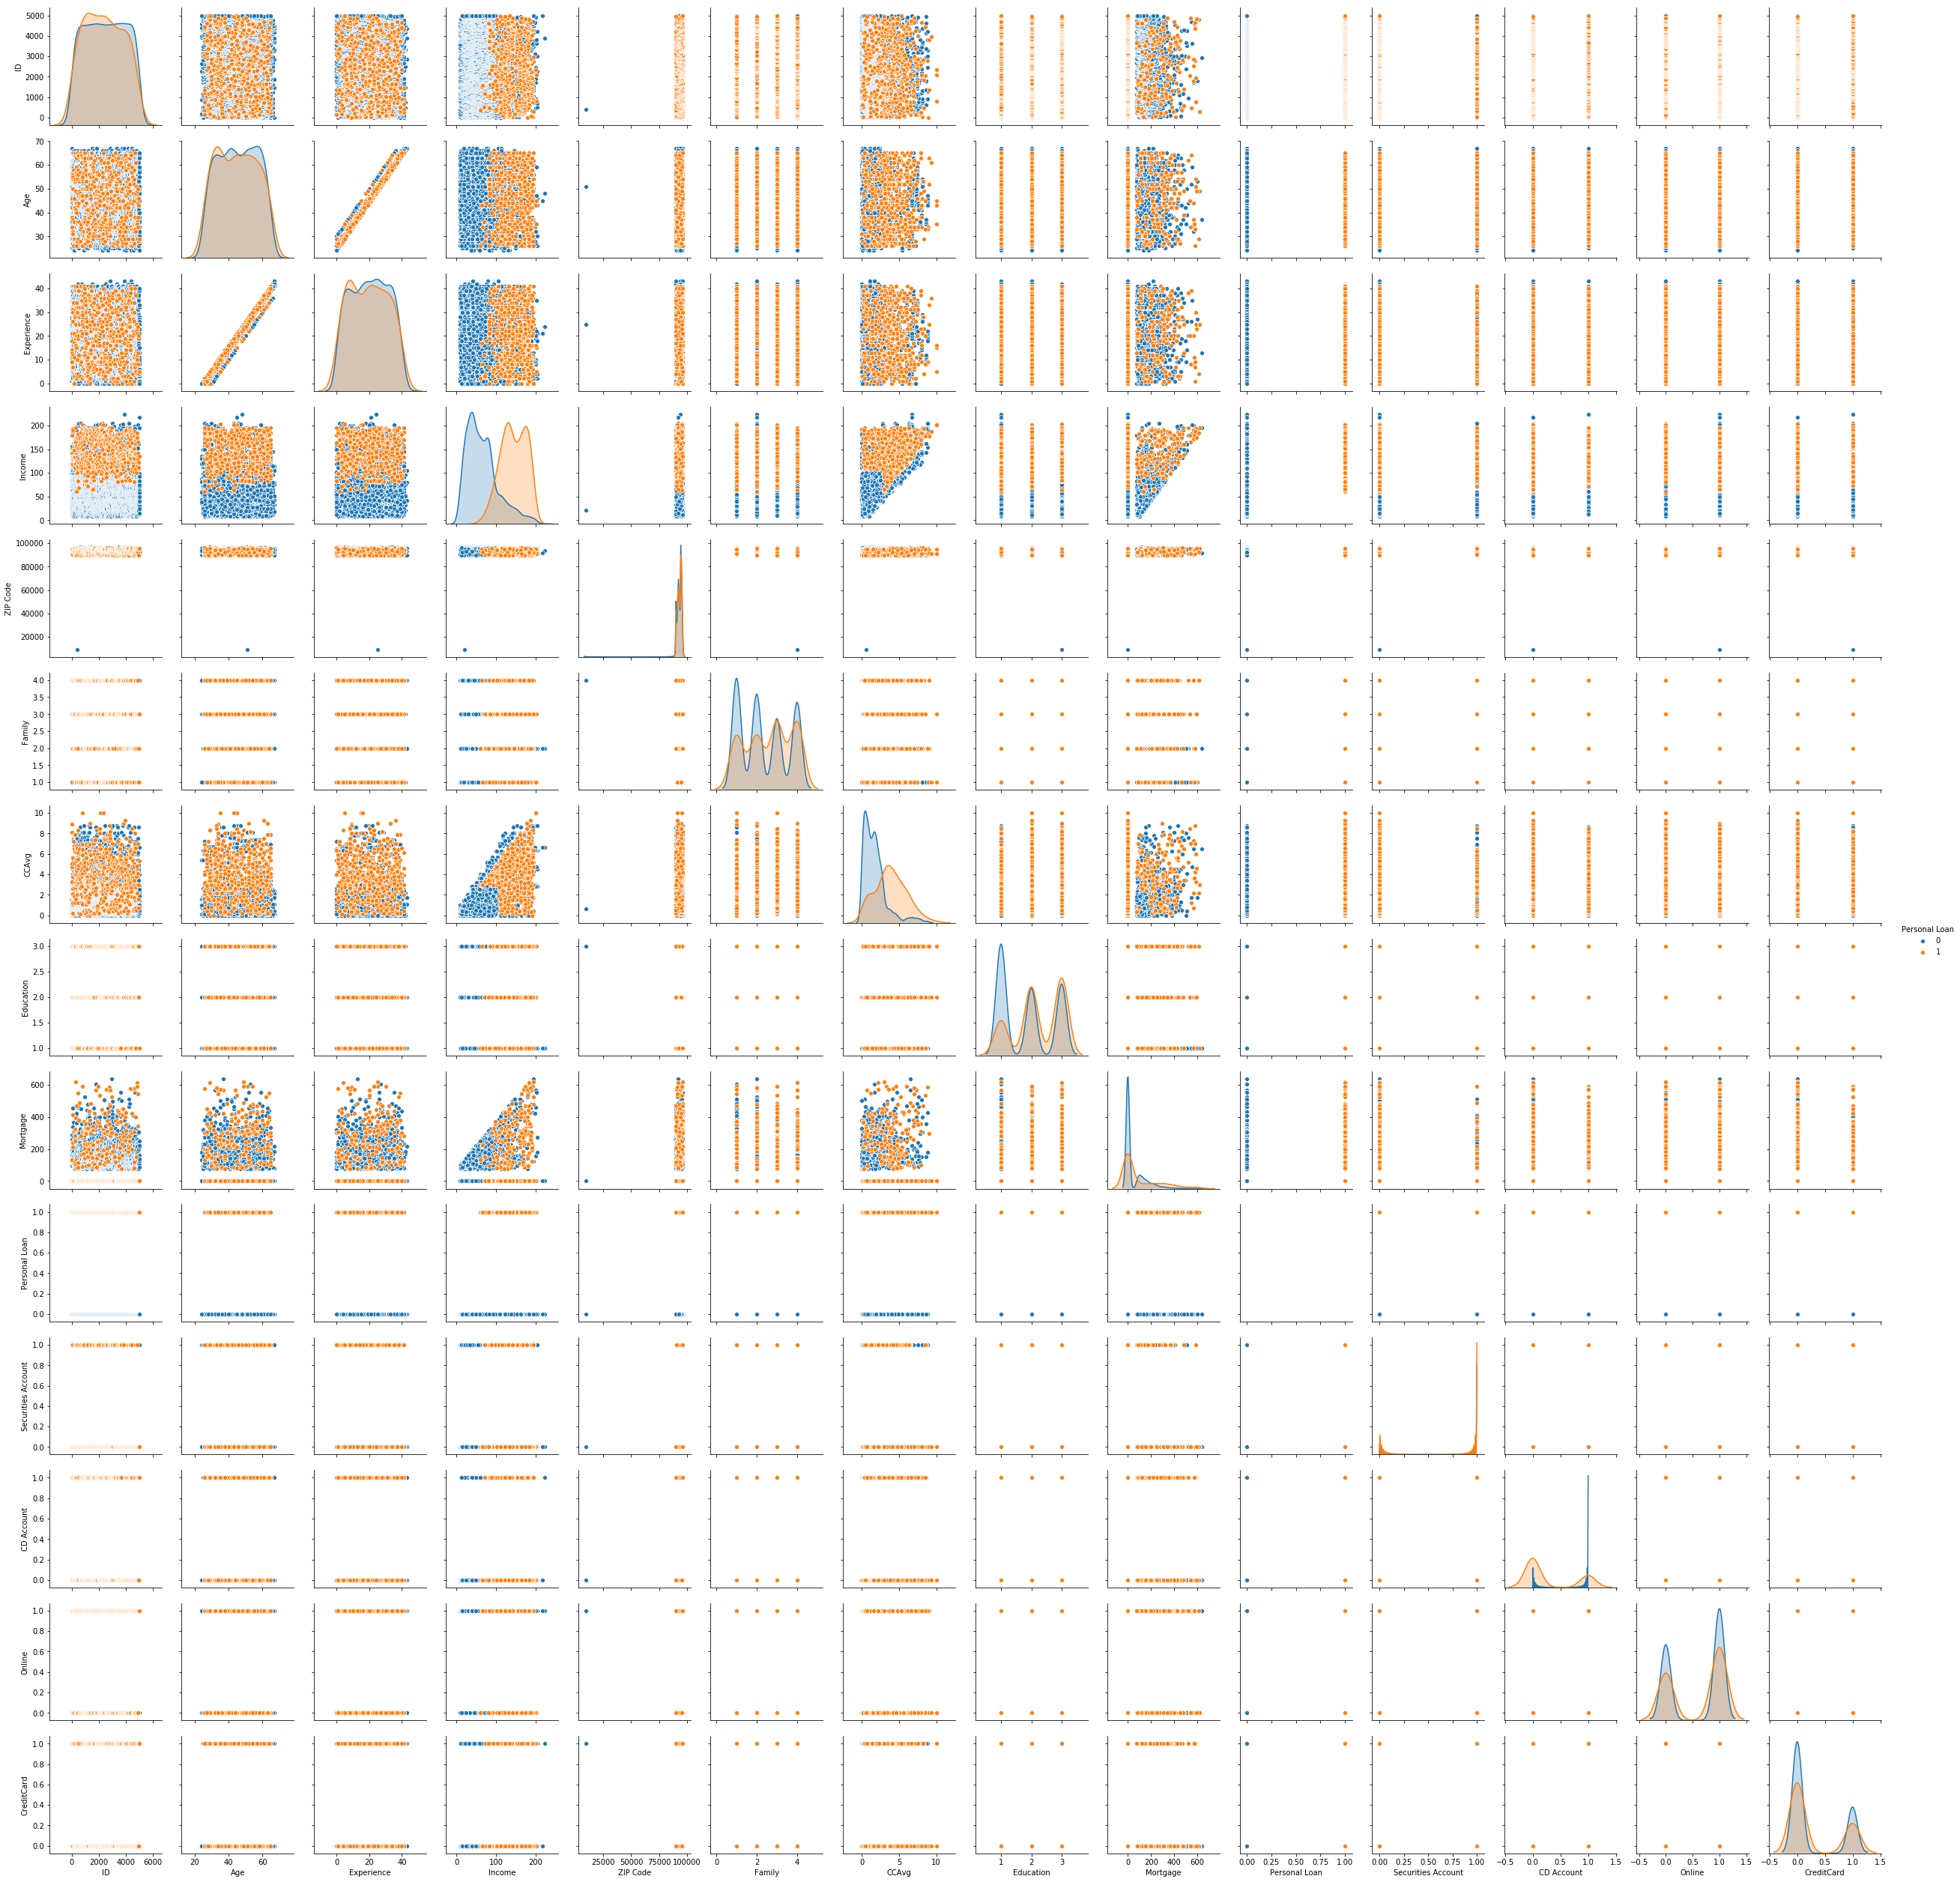

In [46]:
sns.pairplot(df, diag_kind='kde', hue='Personal Loan')

In [47]:
#The graph show persons who have personal loan have a higher credit card average
#There is a positive correlation between age and experience.

In [48]:
df['Personal Loan'].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

Get the target column distribution. Your comments

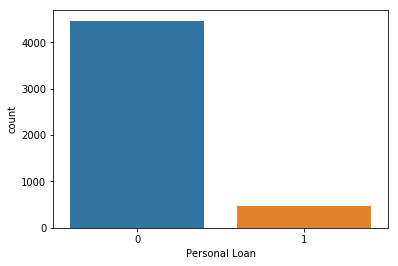

In [61]:
sns.countplot(df['Personal Loan'])

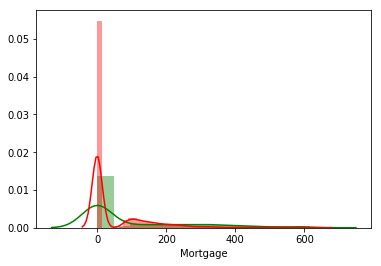

In [71]:
sns.distplot(df[df['Personal Loan'] == 1]['Mortgage'], color='g')
sns.distplot(df[df['Personal Loan'] == 0]['Mortgage'], color='r')

In [16]:
#From the above plot we can see that people who dont have a personal loan are more in number than people who got personal loan
#Cheking the relationship between CCAvg and Peronal loan

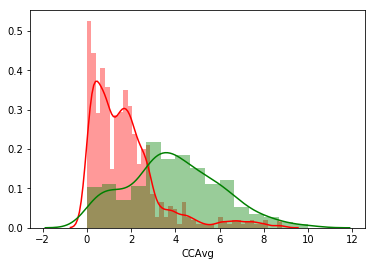

In [17]:
#Cheking the relationship between CCAvg and Peronal loan
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [18]:
#The graph show persons who have personal loan have a higher credit card average

In [19]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


In [20]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

CreditCard          CreditCard            1.000000
Age                 Experience            0.994101
CCAvg               Income                0.646178
Personal Loan       Income                0.504228
                    CCAvg                 0.369388
Securities Account  CD Account            0.319056
CD Account          Personal Loan         0.315769
                    CreditCard            0.280151
Income              Mortgage              0.206921
                    Education             0.187992
CD Account          Online                0.176768
Income              CD Account            0.170171
                    Family                0.155666
Mortgage            Personal Loan         0.142322
Personal Loan       Education             0.138339
CD Account          CCAvg                 0.137587
CCAvg               Education             0.133939
Mortgage            CCAvg                 0.109905
CCAvg               Family                0.107230
Mortgage            CD Account 

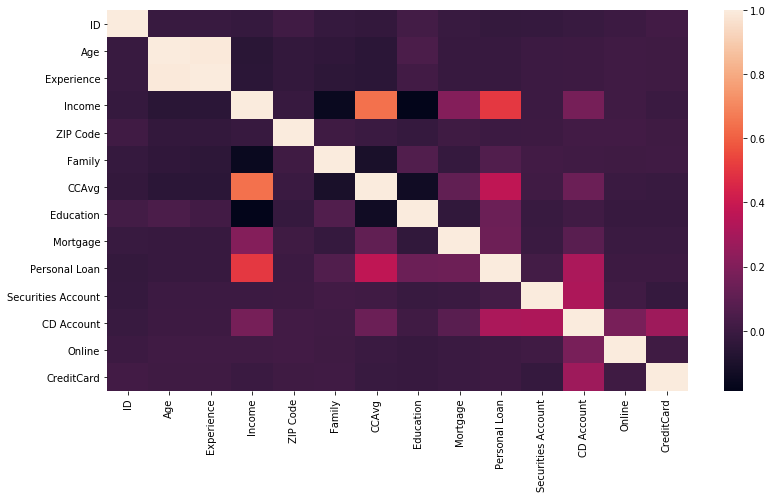

In [21]:
plot.figure(figsize=(13,7))
sns.heatmap(df.corr())

In [22]:
#Age and Experience seems to have high correlation.
#CCAvg and Income seems to be slightly correlated

Split the data into training and test set in the ratio of 70:30 respectively

In [23]:
from sklearn.model_selection import train_test_split
df = df.drop(['ID','Experience'] , axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
X = df.drop('Personal Loan', axis=1)
Y= df.pop('Personal Loan')
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3 , random_state=1)

In [25]:
X_train.shape

(3463, 11)

In [26]:
Y_train.shape

(3463,)

In [27]:
X_test.shape

(1485, 11)

Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [29]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
lr_score = lr.score(X_test, Y_test)
print('Score',lr_score)
print('Confusion Matrix \n',confusion_matrix(Y_test, Y_predict))

Score 0.9043771043771044
Confusion Matrix 
 [[1298   42]
 [ 100   45]]


C:\Users\hp\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
knn_score = knn.score(X_test, Y_test)
print('Score',knn_score)
print('Confusion Matrix \n',confusion_matrix(Y_test, Y_predict))

Score 0.901010101010101
Confusion Matrix 
 [[1316   24]
 [ 123   22]]


In [31]:
GB = GaussianNB()
GB.fit(X_train, Y_train)
Y_predict = GB.predict(X_test)
GB_score = GB.score(X_test, Y_test)
print('Score',GB_score)
print('Confusion Matrix \n',confusion_matrix(Y_test, Y_predict))

Score 0.8821548821548821
Confusion Matrix 
 [[1226  114]
 [  61   84]]


Give your reasoning on which is the best model in this case and why it performs better? (10 points)

In [32]:
#KNN Classifier seems to have the higher accuracy out of the three models. Hence, we can consider the same as the best model in this case.
